# Bang Marketing 
Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, diperlukan lebih dari satu
kontak ke klien yang sama, untuk mengakses apakah produk (deposito berjangka bank) akan
berlangganan ('ya') atau tidak ('tidak').


In [7]:
# import library
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import plot as plt 

In [20]:
# Mengimpor kelas LabelEncoder untuk mengubah label kategori (teks atau string) menjadi angka.
from sklearn.preprocessing import LabelEncoder

In [36]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler

In [42]:
from imblearn.over_sampling import SMOTE

In [48]:
from sklearn.model_selection import train_test_split

In [58]:
from sklearn.linear_model import LogisticRegression

In [66]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
#Import scikit-learn metrics module untuk akurasi perhitungan
from sklearn import metrics

In [76]:
#Import Model Knearest Keighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

In [82]:
from sklearn.svm import SVC

In [84]:
# import tree model
from sklearn import tree

In [88]:
# Import Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier

In [91]:
# Untuk menampilkan plot Decision Tree
from sklearn.tree import plot_tree

In [108]:
# import RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

In [124]:
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

## Data Collecting

In [8]:
pd.set_option('display.max_columns', 21)
df_bank = pd.read_csv("bank-additional-full.csv", sep=";")
df_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## EDA

In [9]:
# Cek Julmlah Data
df_bank.shape

(41188, 21)

In [10]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [17]:
df_bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [12]:
df_bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
df_bank.duplicated().sum()

12

## Data Pre-Processing

In [15]:
df_bank.drop_duplicates(inplace=True)

In [18]:
# Menghapus data yang duplikat
df_bank.duplicated().sum()

0

In [21]:
columns_to_encode = ["job", "marital", "education", "default", "housing", "loan", "contact", 
                     "month", "poutcome", "y", "emp.var.rate", "cons.price.idx", "cons.conf.idx", 
                     "euribor3m", "nr.employed", "day_of_week"]

label_encoder = LabelEncoder()

for column in columns_to_encode:
    df_bank[column] = label_encoder.fit_transform(df_bank[column])

In [26]:
df_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,8,18,16,287,8,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,8,18,16,287,8,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,8,18,16,287,8,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,8,18,16,287,8,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,8,18,16,287,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,334,1,999,0,1,5,25,0,171,0,1
41184,46,1,1,5,0,0,0,0,7,0,383,1,999,0,1,5,25,0,171,0,0
41185,56,5,1,6,0,2,0,0,7,0,189,2,999,0,1,5,25,0,171,0,0
41186,44,9,1,5,0,0,0,0,7,0,442,1,999,0,1,5,25,0,171,0,1


In [27]:
# Cek Julmlah Data
df_bank.shape

(41176, 21)

AttributeError: 'function' object has no attribute 'title'

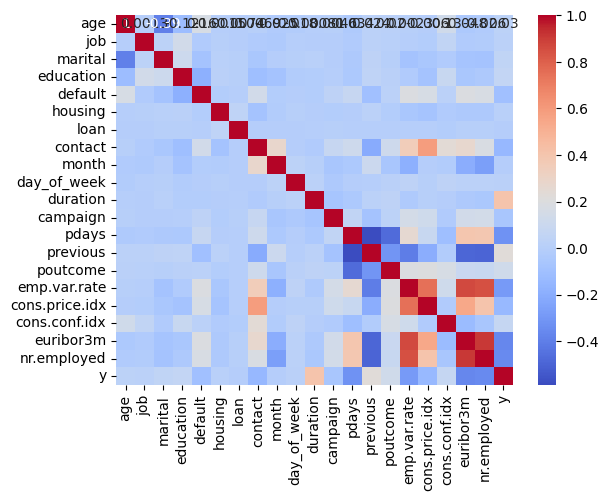

In [136]:
# Menampilkan Heatmap
correlation_matrix = df_bank.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
#add title to heatmap
plt.title('')

In [38]:
# Memisahkan fitur (X) dan target (y)
features = ['age', 'job', 'marital']

X = df_bank[features]
y = df_bank['y']

In [49]:
# Penanganan Ketidakseimbangan Kelas
smote = SMOTE(random_state=42)
X,y = smote.fit_resample(X,y)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Scale Data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#transform array to dafaframe

In [133]:
features = []
for col in df_bank.columns:
    if col != 'y':
        features.append(col)

target = 'y'

x = df_bank[features]
y = df_bank[target]
x = pd.DataFrame(x, columns = features) 

## Logistic Regression

In [59]:
model_logreg = LogisticRegression()

model_logreg.fit(X_train, y_train)

LogisticRegression()

In [63]:
model_logreg.score(X_train, y_train)

0.5477000975042338

In [64]:
model_logreg.score(X_test, y_test)

0.5395141977420459

In [60]:
y_pred = model_logreg.predict(X_test)

In [61]:
print('Accuracy : ', accuracy_score(y_test, y_pred))

Accuracy :  0.5395141977420459


In [67]:
confusion_matrix(y_test, y_pred)

array([[3724, 3624],
       [3106, 4161]], dtype=int64)

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.51      0.53      7348
           1       0.53      0.57      0.55      7267

    accuracy                           0.54     14615
   macro avg       0.54      0.54      0.54     14615
weighted avg       0.54      0.54      0.54     14615



### Kesimpulan:
- Model ini memiliki tingkat akurasi sebesar 0.54, yang berarti model ini benar dalam memprediksi label kelas sebanyak 54% dari total data 
  
- Untuk kelas '0', precision (tingkat ketepatan) adalah sekitar 0.55, yang artinya model memprediksi kelas '0', prediksi tersebut benar sekitar 55% dari waktu. Recall (tingkat keberhasilan mengidentifikasi) untuk kelas '0' adalah sekitar 0.51, yang berarti model mengidentifikasi sekitar 51% dari seluruh contoh kelas '0' dengan benar. F1-score (ukuran yang seimbang antara precision dan recall) untuk kelas '0' adalah sekitar 0.53.
  
- Untuk kelas '1', precision adalah sekitar 0.53, yang berarti ketika model memprediksi kelas '1', prediksi tersebut benar sekitar 53% dari waktu. Recall untuk kelas '1' adalah sekitar 0.57, yang berarti model mengidentifikasi sekitar 57% dari seluruh contoh kelas '1' dengan benar. F1-score untuk kelas '1' adalah sekitar 0.55.
  
- Secara keseluruhan, model ini memiliki kinerja yang cukup seimbang antara kedua kelas, tetapi masih ada ruang untuk perbaikan.

## K-Nearest Neighbors

In [78]:
# Create KNN classifier with a specified number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on your training data
knn_classifier.fit(X_train, y_train)

# Make predictions on new data
y_pred = knn_classifier.predict(X_test)

# Evaluate the model's performance (e.g., accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.616832021895313


In [79]:
confusion_matrix(y_test, y_pred)

array([[4856, 2492],
       [3108, 4159]], dtype=int64)

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.66      0.63      7348
           1       0.63      0.57      0.60      7267

    accuracy                           0.62     14615
   macro avg       0.62      0.62      0.62     14615
weighted avg       0.62      0.62      0.62     14615



### Kesimpulan

1. **Precision**:
   - Precision: : Untuk kelas '0', presisi adalah 0,61, dan untuk kelas '1', presisi adalah 0,63. Ini berarti ketika model memprediksi kelas '0', 61% prediksi tersebut benar-benar tepat, dan ketika memprediksi kelas '1', 63% prediksi tersebut benar-benar tepat.

2. **Recall**:
   - Recall: Recall (atau Sensitivitas) adalah ukuran sejauh mana hasil prediksi mampu mengidentifikasi instance positif yang sebenarnya. Untuk kelas '0', recall adalah 0,66, dan untuk kelas '1', recall adalah 0,57. Ini berarti model dapat mengidentifikasi 66% instance kelas '0' yang sebenarnya, dan 57% instance kelas '1' yang sebenarnya.
   
3. **F1-Score**:
   - f1-score Skor F1 adalah rata-rata harmonik antara presisi dan recall. Untuk kelas '0', skor F1 adalah 0,63, dan untuk kelas '1', skor F1 adalah 0,60. Skor ini memberikan keseimbangan antara presisi dan recall. Semakin tinggi skor F1, semakin baik keseimbangan antara presisi dan recall.

4. **Accuracy**:
   - Accuracy: adalah 0,62, atau 62%. Ini berarti model dengan benar memprediksi label kelas untuk 62% instance dalam dataset.

5. **Support**:
   - Support 'Support' adalah jumlah instance dari masing-masing kelas dalam dataset pengujian. Ada 7348 instance kelas '0' dan 7267 instance kelas '1' dalam dataset pengujian.
6. **Kesimpulan Umum**:
    - Dengan demikian, model ini memiliki akurasi sekitar 62% dalam memprediksi kelas pada dataset. Skor Precision, Recall, dan f1-score juga menunjukkan bahwa model memiliki keseimbangan yang baik dalam mengklasifikasikan kedua kelas.

## Support Vector Machine

In [83]:
# Create an instance of the SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the SVM model
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5414984604858023


In [115]:
confusion_matrix(y_test, y_pred)

array([[5063, 2285],
       [3837, 3430]], dtype=int64)

In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.69      0.62      7348
           1       0.60      0.47      0.53      7267

    accuracy                           0.58     14615
   macro avg       0.58      0.58      0.58     14615
weighted avg       0.58      0.58      0.58     14615



## Decision Tree

In [86]:
dt = tree.DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [89]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5811152925076976


In [101]:
confusion_matrix(y_test, y_pred)

array([[5063, 2285],
       [3837, 3430]], dtype=int64)

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.69      0.62      7348
           1       0.60      0.47      0.53      7267

    accuracy                           0.58     14615
   macro avg       0.58      0.58      0.58     14615
weighted avg       0.58      0.58      0.58     14615



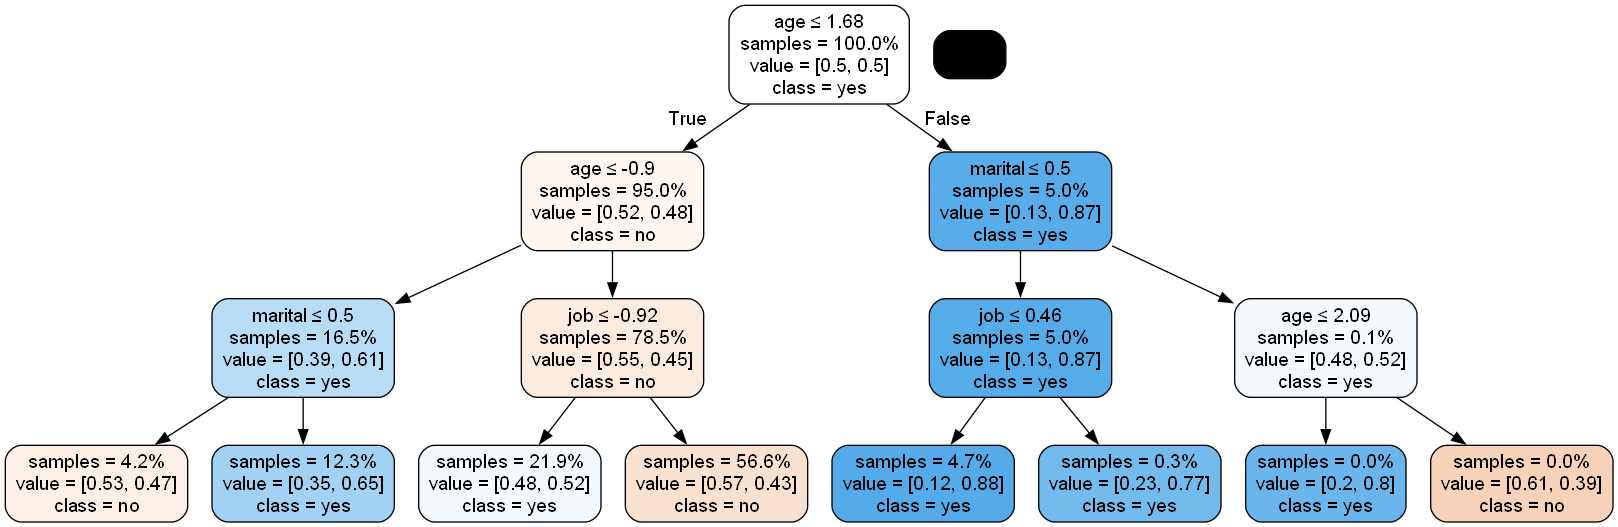

In [137]:

# Specify the feature names as a list
feature_names = ['age', 'job', 'marital']  # Replace with your actual feature names

dot_data = StringIO()
export_graphviz(dt, feature_names=feature_names, out_file=dot_data,
                filled=True, rounded=True, proportion=True, special_characters=True,
                impurity=False, class_names=['no', 'yes'], precision=2)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


## Randome Forest

In [106]:
rfc = RandomForestClassifier(random_state = 1)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [110]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5811152925076976


In [111]:
confusion_matrix(y_test, y_pred)

array([[5063, 2285],
       [3837, 3430]], dtype=int64)

In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.69      0.62      7348
           1       0.60      0.47      0.53      7267

    accuracy                           0.58     14615
   macro avg       0.58      0.58      0.58     14615
weighted avg       0.58      0.58      0.58     14615



### Kesimpulan 
1. **Precision**: 
   - Model cenderung lebih baik dalam mengidentifikasi kelas '0' daripada kelas '1', seperti yang diindikasikan oleh recall yang lebih tinggi untuk kelas '0' (0.69 vs. 0.47).
Akurasi model sekitar 0.581 atau sekitar 58.1%. Berarti model benar memprediksi label kelas sekitar 58.1% dari total sampel di dataset.

2. **Recall**:
   - Precision mengukur berapa banyak dari prediksi positif yang sebenarnya positif. Untuk kelas '0', presisi adalah sekitar 57%, sedangkan untuk kelas '1', presisi adalah sekitar 60%.
  
3. **F1-Score**:
   - F1 Score adalah rata-rata harmonik dari presisi dan recall. Untuk kelas '0', F1-Score adalah sekitar 0.62, sedangkan untuk kelas '1', F1-Score adalah sekitar 0.53.

5. **Accuracy**:
   - Akurasi keseluruhan model adalah 0.58 atau 58%. Ini mengindikasikan bahwa model dengan benar memprediksi label kelas sekitar 58% dari seluruh instance di dataset pengujian.

6. **Kesimpulan Umum**:
   - Jadi model memiliki akurasi sekitar 58.1% dengan presisi yang relatif setara antara kelas '0' dan '1', tetapi recall lebih tinggi untuk kelas '0' daripada kelas '1'. artinya, model cenderung lebih baik dalam mengidentifikasi sampel dari kelas '0' daripada kelas '1'.utuhan Anda.

## Naive Bayes

In [ ]:
# Create a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the model on the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)


In [122]:
# Evaluate the model's accuracy and performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

confusion_matrix(y_test, y_pred)

array([[5063, 2285],
       [3837, 3430]], dtype=int64)

In [123]:
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.5811152925076976
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.69      0.62      7348
           1       0.60      0.47      0.53      7267

    accuracy                           0.58     14615
   macro avg       0.58      0.58      0.58     14615
weighted avg       0.58      0.58      0.58     14615



### Kesimpulan


1. **Precision**: 
   - Untuk kelas '0', precision adalah 0.57, yang berarti model benar sekitar 57% dari waktu ketika memprediksi kelas '0'.
   - Untuk kelas '1', precision adalah 0.60, yang berarti model benar sekitar 60% dari waktu ketika memprediksi kelas '1'.

2. **Recall**:
   - Untuk kelas '0', recall adalah 0.69, yang berarti model berhasil mengidentifikasi sekitar 69% dari total instance kelas '0'.
   - Untuk kelas '1', recall adalah 0.47, yang berarti model berhasil mengidentifikasi sekitar 47% dari total instance kelas '1'.

3. **F1-Score**:
   - F1-Score adalah ukuran seimbang antara precision dan recall.
   - Untuk kelas '0', F1-Score adalah 0.62.
   - Untuk kelas '1', F1-Score adalah 0.53.

4. **Accuracy**:
   - Akurasi keseluruhan model adalah 0.58 atau 58%. Ini mengindikasikan bahwa model dengan benar memprediksi label kelas sekitar 58% dari seluruh instance di dataset pengujian.

5. **Kesimpulan Umum**:
   - Model memiliki kinerja yang sebanding baik untuk kelas '0' dan '1, dengan F1-Score yang cukup baik (0.62 untuk kelas '0' dan 0.53 untuk kelas '1').
   - Model cenderung lebih baik dalam mengidentifikasi kelas '0' daripada kelas '1', seperti yang diindikasikan oleh recall yang lebih tinggi untuk kelas tingkatkan.Kesimpulan

## KESIMPULAN AKHIR

Jadi Model yang sangat baik itu pada K-Nearest Neighbors, karena memiliki akurasi sekitar 62% dalam memprediksi kelas pada dataset. Skor Precision, Recall, dan f1-score juga menunjukkan bahwa model memiliki keseimbangan yang baik dalam mengklasifikasikan kedua kelas.